In [2]:
#import some of the required libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
#loading the data
from scipy.io import loadmat

def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('data/train_32x32.mat')
X_test, y_test = load_data('data/test_32x32.mat')
X_extra, y_extra = load_data('data/extra_32x32.mat')

print("Training", X_train.shape, y_train.shape)
print("Testing", X_test.shape, y_test.shape)
print("Extra", X_extra.shape, y_extra.shape)

Training (32, 32, 3, 73257) (73257, 1)
Testing (32, 32, 3, 26032) (26032, 1)
Extra (32, 32, 3, 531131) (531131, 1)


In [4]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
X_extra, y_extra = X_extra.transpose((3,0,1,2)), y_extra[:,0]

print("Training", X_train.shape)
print("Test", X_test.shape)
print("Extra", X_extra.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0] + X_extra.shape[0]

print("Total Number of Images", num_images)

Training (73257, 32, 32, 3)
Test (26032, 32, 32, 3)
Extra (531131, 32, 32, 3)

Total Number of Images 630420


In [12]:
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat):
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

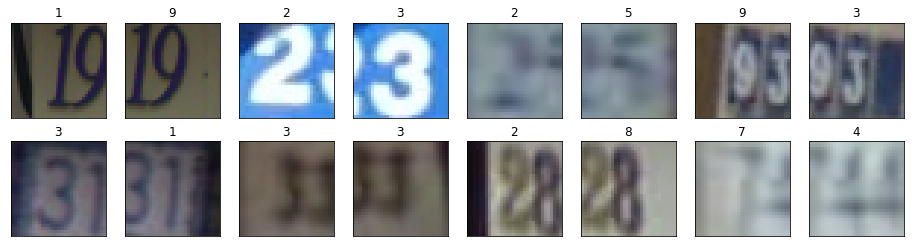

In [13]:
plot_images(X_train, y_train, 2, 8)

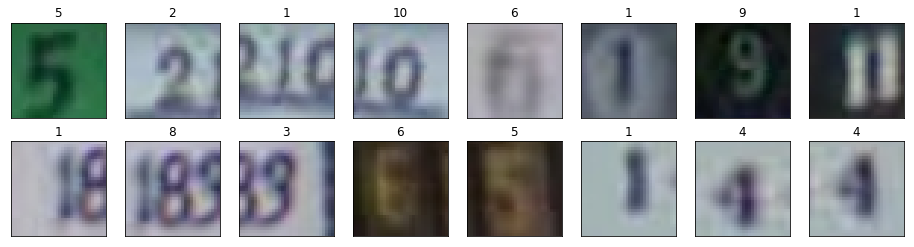

In [14]:
plot_images(X_test, y_test, 2, 8)

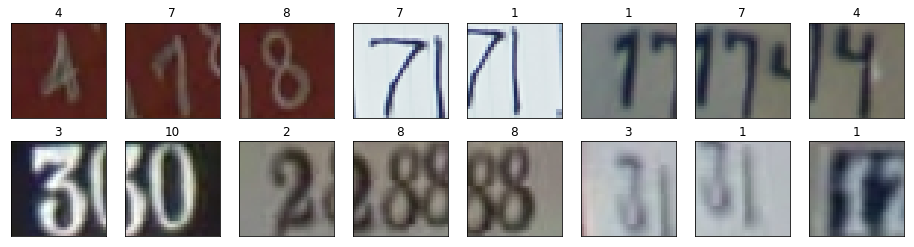

In [15]:
plot_images(X_extra, y_extra, 2, 8)

In [16]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


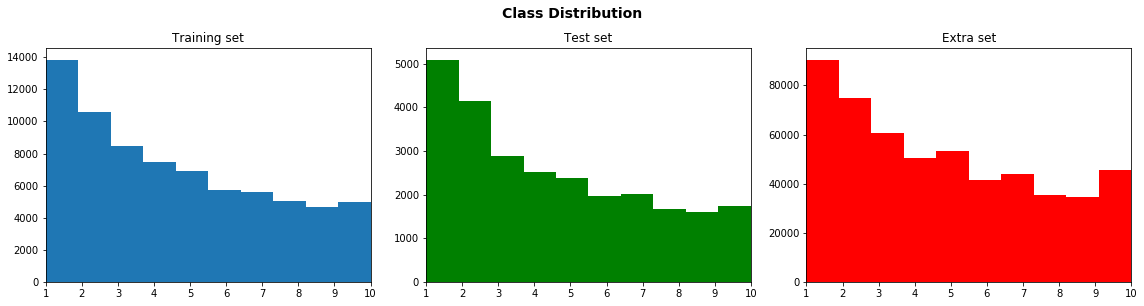

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True)
fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

ax3.hist(y_extra, color='r', bins=10);
ax3.set_title("Extra set");

fig.tight_layout()

In [21]:
#the label of 0 is given as 10 in the y_train array, so re assign it to 0
y_train[y_train== 10] = 0
y_test[y_test== 10] = 0
y_extra[y_extra== 10] = 0

#testing the changes made
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [22]:
#creating a balanced data set by making a new validation set comprising 2/3 of the test samples, 
#and 1/3 of the extra samples. Total samples taken will be 6000 (600 for each class)
# s=size of sample, y = np.array
def balanced_subsample(y, s):
    sample = []
    for label in np.unique(y):
        images = np.where(y==label)[0]
        random_sample = np.random.choice(images, size = s, replace = False)
        sample += random_sample.tolist()
    return sample

In [23]:
train_samples = balanced_subsample(y_train, 400)
extra_samples = balanced_subsample(y_extra, 200)

X_val, y_val = np.copy(X_train[train_samples]), np.copy(y_train[train_samples])

# Remove the samples to avoid duplicates
X_train = np.delete(X_train, train_samples, axis=0)
y_train = np.delete(y_train, train_samples, axis=0)

X_val = np.concatenate([X_val, np.copy(X_extra[extra_samples])])
y_val = np.concatenate([y_val, np.copy(y_extra[extra_samples])])

# Remove the samples to avoid duplicates
X_extra = np.delete(X_extra, extra_samples, axis=0)
y_extra = np.delete(y_extra, extra_samples, axis=0)

X_train = np.concatenate([X_train, X_extra])
y_train = np.concatenate([y_train, y_extra])
X_test, y_test = X_test, y_test

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Validation', X_val.shape, y_val.shape)

Training (598388, 32, 32, 3) (598388,)
Test (26032, 32, 32, 3) (26032,)
Validation (6000, 32, 32, 3) (6000,)


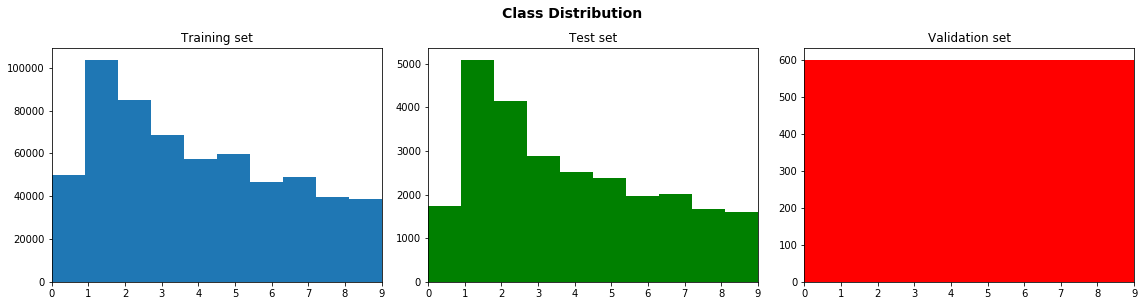

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(0, 9)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

ax3.hist(y_val, color='r', bins=10);
ax3.set_title("Validation set");

fig.tight_layout()

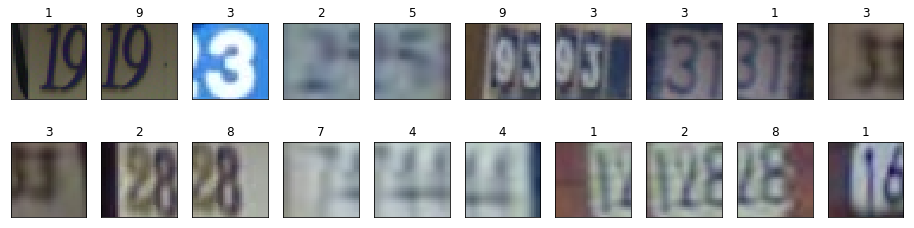

In [29]:
assert(num_images == X_train.shape[0] + X_test.shape[0] + X_val.shape[0])
plot_images(X_train, y_train, 2, 10)

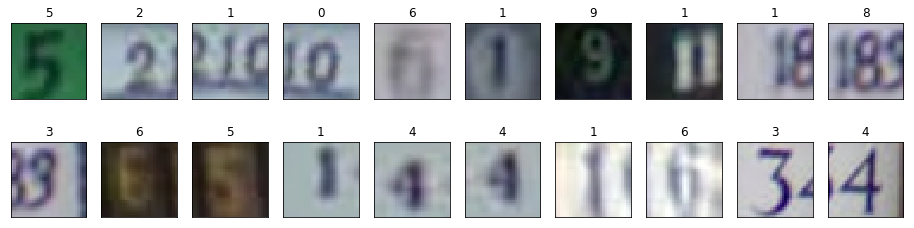

In [30]:
plot_images(X_test, y_test, 2, 10)

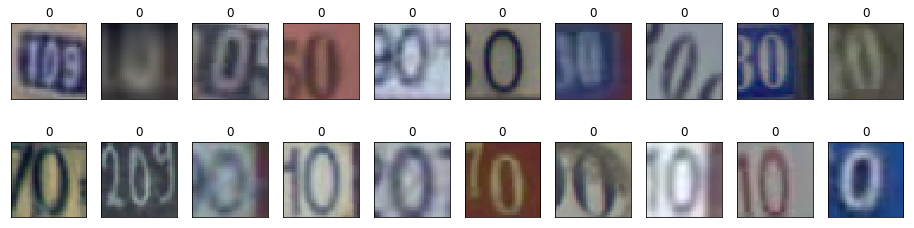

In [31]:
plot_images(X_val, y_val, 2, 10)

In [32]:
suffixes = ['B', 'KB', 'MB', 'GB']

def humansize(nbytes):
    if nbytes == 0: return '0 B'
    i = 0
    while nbytes >= 1024:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

Dimensions
Training set (598388, 32, 32, 3) (598388, 32, 32, 1)
Test set (26032, 32, 32, 3) (26032, 32, 32, 1)
Validation set (6000, 32, 32, 3) (6000, 32, 32, 1)

Data Type
Training set uint8 float32
Test set uint8 float32
Validation set uint8 float32

Dataset Size
Training set 1.71 GB 2.28 GB
Test set 76.27 MB 101.69 MB
Validation set 17.58 MB 23.44 MB


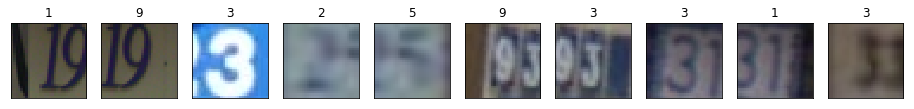

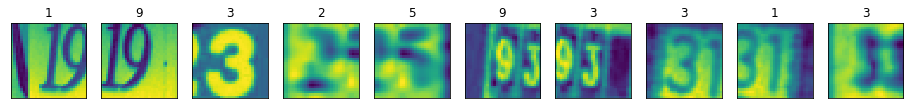

In [33]:
def rgb2gray(images):
    """Convert images from rgb to grayscale
    """
    return np.expand_dims(np.dot(images, [0.2989, 0.5870, 0.1140]), axis=3)

# Transform the images to greyscale
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
valid_greyscale = rgb2gray(X_val).astype(np.float32)

# Keep the size before convertion
size_before = (X_train.nbytes, X_test.nbytes, X_val.nbytes)

# Size after transformation
size_after = (train_greyscale.nbytes, test_greyscale.nbytes, valid_greyscale.nbytes)

print("Dimensions")
print("Training set", X_train.shape, train_greyscale.shape)
print("Test set", X_test.shape, test_greyscale.shape)
print("Validation set", X_val.shape, valid_greyscale.shape)
print('')

print("Data Type")
print("Training set", X_train.dtype, train_greyscale.dtype)
print("Test set", X_test.dtype, test_greyscale.dtype)
print("Validation set", X_val.dtype, valid_greyscale.dtype)
print('')

print("Dataset Size")
print("Training set", humansize(size_before[0]), humansize(size_after[0]))
print("Test set", humansize(size_before[1]), humansize(size_after[1]))
print("Validation set", humansize(size_before[2]), humansize(size_after[2]))

plot_images(X_train, y_train, 1, 10)
plot_images(train_greyscale, y_train, 1, 10)

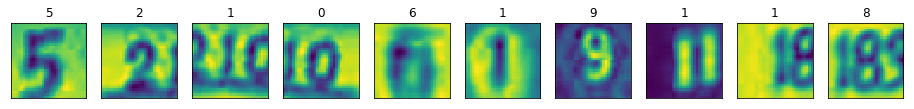

In [35]:
plot_images(test_greyscale, y_test, 1,10)

In [36]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Test set", y_test.shape)
print("Training set", y_val.shape)

Training set (598388, 10)
Test set (26032, 10)
Training set (6000, 10)


In [37]:
#saving the greyscale images
import h5py

# Create file
h5f = h5py.File('data/SVHN_single_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_greyscale)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_greyscale)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=valid_greyscale)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

G:\Installed\Anaconda\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
